In [70]:
from PIL import Image
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
from pythonlibs.torch_lib1 import *

In [71]:
data_dir = '/shin/dog_wolf2'

import os
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [72]:
# 검증 데이터용: 정규화만을 실시
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])




# 학습 데이터용: 정규화에 RandomHorizontalFlip 과 RandomErasing 을 추가로 실시
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)   
])
train_data = datasets.ImageFolder(train_dir,transform = trans)
train_data2 = datasets.ImageFolder(train_dir, transform=test_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# dataloader 정의
batch_size = 5
#train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_data, batch_size=5, shuffle=True)
train_loader2 = DataLoader(train_data2, batch_size=40, shuffle=False)
test_loader = DataLoader(test_data, batch_size=5, shuffle=False)
test_loader2 = DataLoader(test_data, batch_size=10, shuffle=True)

In [73]:
test_data.__getitem__(5)

(tensor([[[-0.0118, -0.0196, -0.0431,  ...,  0.4431,  0.4667,  0.4824],
          [-0.0510, -0.0510, -0.0667,  ...,  0.3882,  0.4588,  0.4902],
          [-0.0667, -0.0667, -0.0745,  ...,  0.3255,  0.4353,  0.4745],
          ...,
          [-0.1608, -0.1608, -0.1529,  ..., -0.9765, -0.9922, -0.9922],
          [-0.1686, -0.1686, -0.1608,  ..., -0.9686, -0.9843, -0.9843],
          [-0.1686, -0.1686, -0.1608,  ..., -0.9608, -0.9765, -0.9765]],
 
         [[-0.7176, -0.7176, -0.7255,  ...,  0.5922,  0.6235,  0.6392],
          [-0.7569, -0.7569, -0.7569,  ...,  0.5373,  0.6157,  0.6471],
          [-0.7725, -0.7725, -0.7725,  ...,  0.4745,  0.5922,  0.6314],
          ...,
          [-0.8275, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8196, -0.8196, -0.8118,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8196, -0.8196, -0.8118,  ..., -1.0000, -1.0000, -1.0000]],
 
         [[-0.6784, -0.6784, -0.6784,  ...,  0.8745,  0.8980,  0.9137],
          [-0.7333, -0.7333,

In [74]:
len(train_data)

47

In [75]:
classes = train_data.classes
classes

['dog', 'wolf']

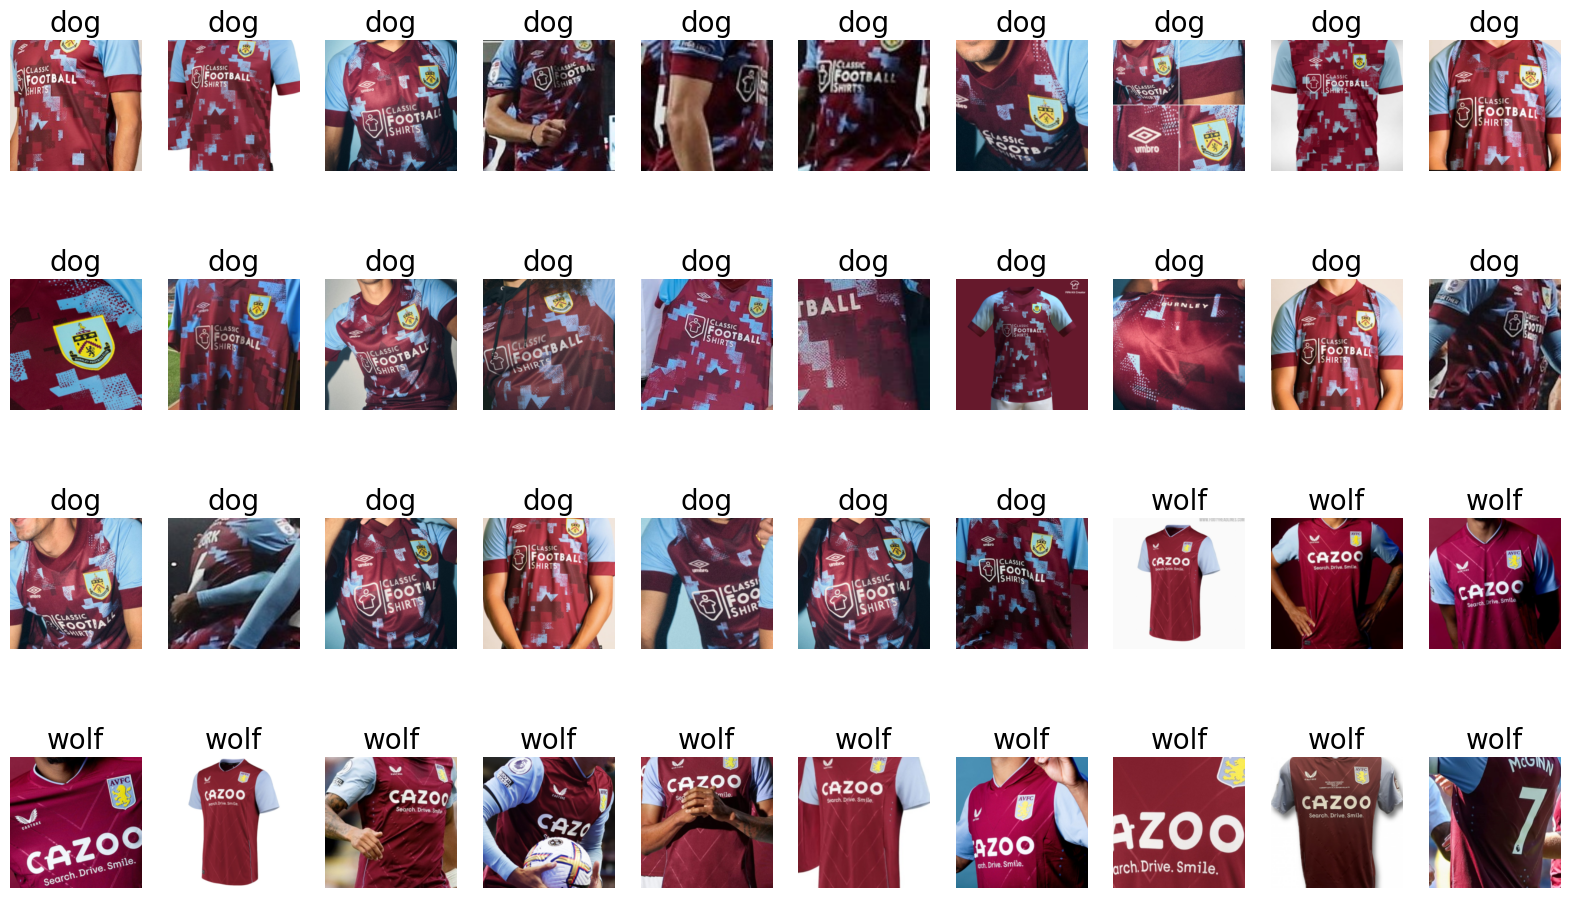

In [76]:
show_images_labels(train_loader2, classes, None, None)

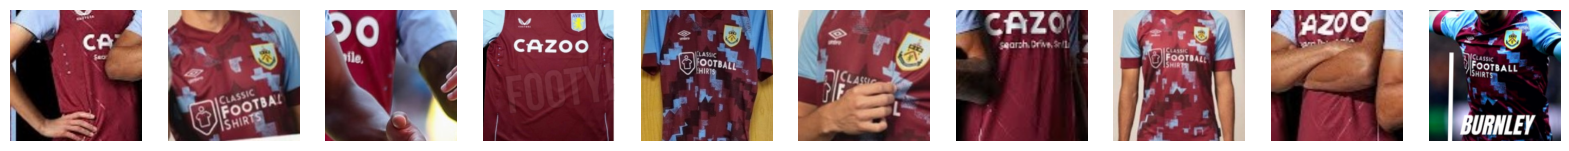

In [77]:
torch_seed()
show_images_labels(test_loader2, ['', ''], None, None)

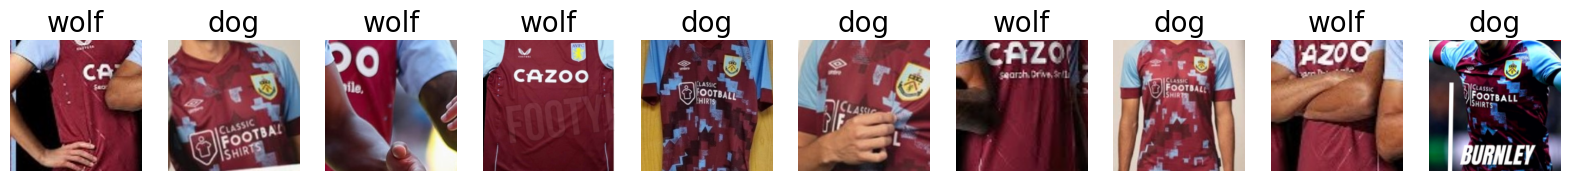

In [88]:
# 검증용 데이터 (10건)
# 이것이 정답 데이터 입니다.
# 10건 중 몇 건의 정답을 맞췄습니까.
torch_seed()
show_images_labels(test_loader2, classes, None, None)


In [89]:
# 사전에 학습이 끝난 모델을 이용해서 모델을 구축 (11장)

# 사전에 학습이 끝난 모델 읽어오기
from torchvision import models
net = models.vgg19_bn(pretrained = True)

# 전이 학습을 위해 required_grad 그래프를 False 로 설정
for param in net.parameters():
    param.requires_grad = False

# 난수 고정
torch_seed()

# 마지막 노드의 출력을 2로 변경
in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, 2)

# AdaptiveAvgPool2d 함수 제거
net.avgpool = nn.Identity()

# GPU 사용
net = net.to(device)

# 학습률
lr = 0.001

# 손실 함수로 교차 엔트로피 사용
criterion = nn.CrossEntropyLoss()

# 최적화함수 정의

# 파라미터 수정 대상을 마지막 노드로 제한함
optimizer = optim.SGD(net.classifier[6].parameters(),lr=lr,momentum=0.9)

# history 파일을 동시에 초기화
history = np.zeros((0, 5))

In [95]:
# 학습(9장)
# 반복 횟수
num_epochs = 10

# 학습 (공통함수)
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

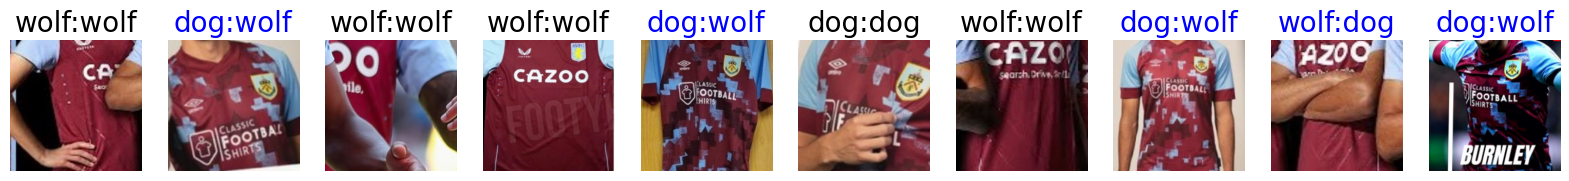

In [83]:
# 검증 데이터를 대상으로 결과 확인 (9장 공통함수)
torch_seed()
show_images_labels(test_loader2, classes, net, device)